Accuracy: 0.8295454545454546
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         5
           3       0.84      0.99      0.91        74

    accuracy                           0.83        88
   macro avg       0.28      0.33      0.30        88
weighted avg       0.71      0.83      0.76        88



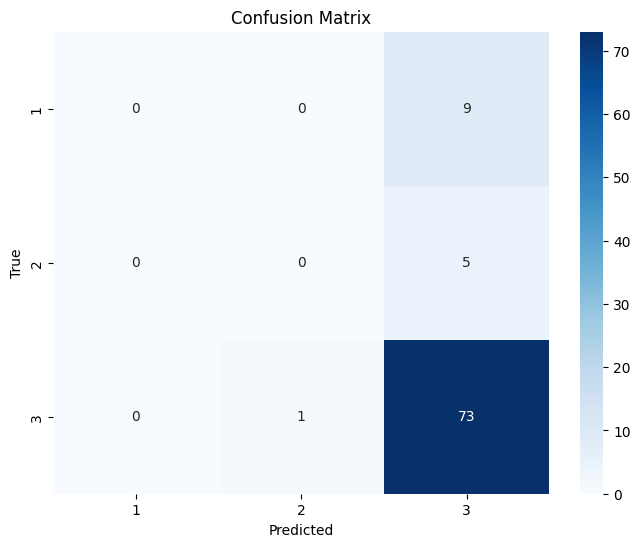

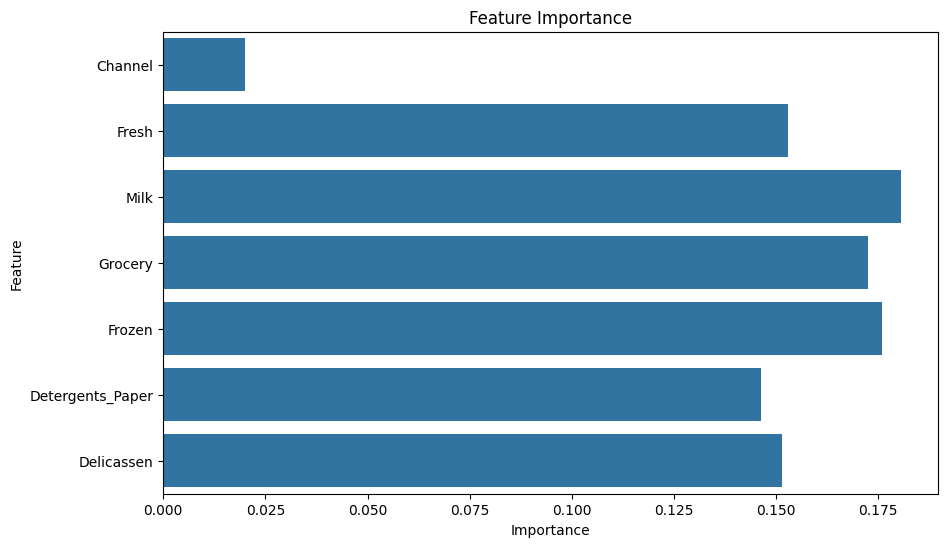

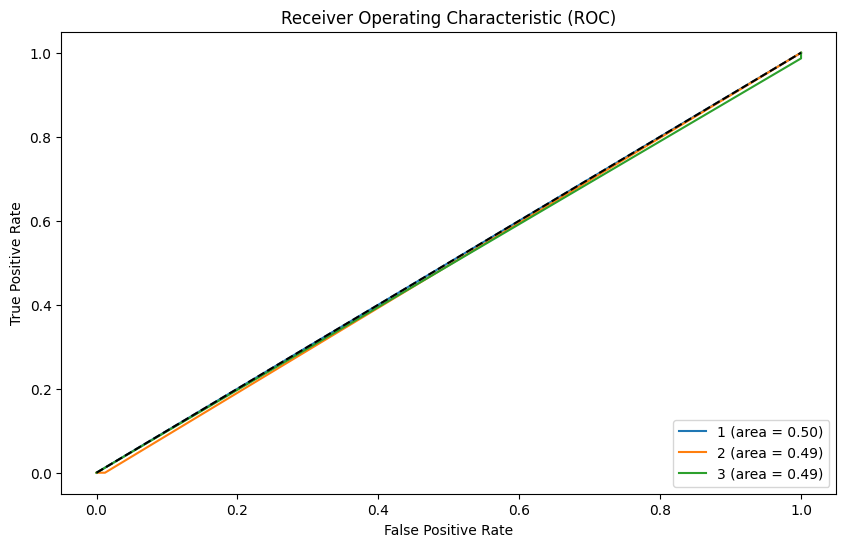

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('customers.csv')

# Explore the data and specify the target variable
# (Assuming 'Region' is the target, adjust as needed)
X = data.drop('Region', axis=1)  # Features
y = data['Region']               # Target label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model with class_weight='balanced'
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)  # Handle zero division warning

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature Importance Visualization
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Optional: ROC Curve (for binary classification or each class)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = lb.transform(y_pred)

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(lb.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{lb.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
